# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Parse the HTML
html = browser.html

# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:

# Create an empty list
marsweather_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract table data
    td_contents = row.find_all('td')
    # Extract text contained within table data
    data = [content.text for content in td_contents]
    # Append the text to the list
    marsweather_list.append(data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
marsweather_df = pd.DataFrame(marsweather_list, columns=columns)

In [9]:
# Confirm DataFrame was created successfully
marsweather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
marsweather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
marsweather_df['id']=marsweather_df['id'].astype(str)
marsweather_df['terrestrial_date']=pd.to_datetime(marsweather_df['terrestrial_date'])
marsweather_df['sol']=marsweather_df['sol'].astype('int64')
marsweather_df['ls']=marsweather_df['ls'].astype('int64')
marsweather_df['month']=marsweather_df['month'].astype('int64')
marsweather_df['min_temp']=marsweather_df['min_temp'].astype(float)
marsweather_df['pressure']=marsweather_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
marsweather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_months = marsweather_df['month'].nunique()
print(mars_months)
print(f"There are", mars_months , "months on Mars! ")

mars_bymonth = marsweather_df.groupby(['month'])['month'].count()
mars_bymonth

12
There are 12 months on Mars! 


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
martian_datadays = marsweather_df['terrestrial_date'].count()
print(martian_datadays)
print(f"There are", martian_datadays , "Martian days' worth of data on Mars! ")

1867
There are 1867 Martian days' worth of data on Mars! 


In [15]:
# 3. What is the average low temperature by month?
marsavg_lowtemp = marsweather_df.groupby('month').mean()['min_temp']
marsavg_lowtemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

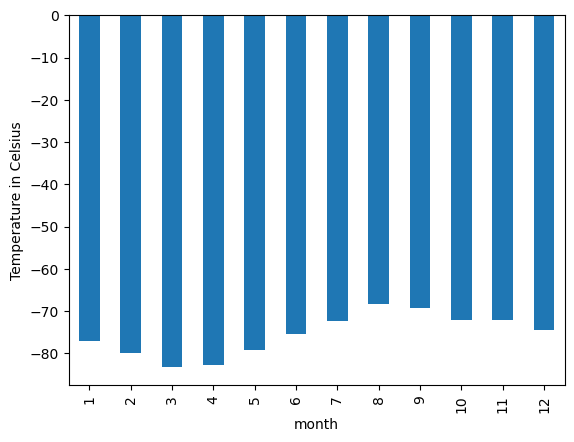

In [16]:
# Plot the average temperature by month
marsavg_lowtemp.plot(kind='bar')
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Find the index of the minimum and maximum values
lowesttemp_month = marsavg_lowtemp.idxmin()
highesttemp_month = marsavg_lowtemp.idxmax()

# Print the lowest and highest temperature months, on average
print("The coldest month is", lowesttemp_month)
print("The hottest month is", highesttemp_month)


The coldest month is 3
The hottest month is 8


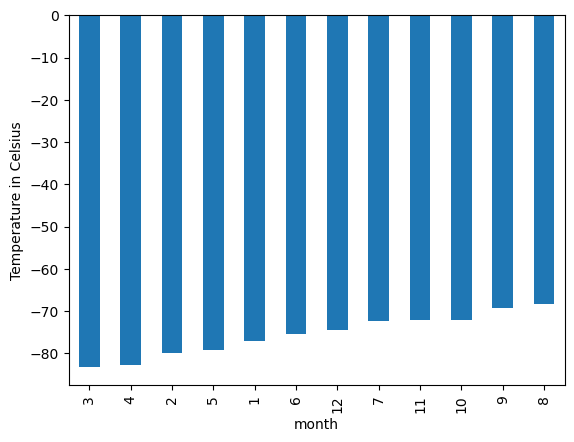

In [18]:
# Plot the average temperature by month, sorted from coldest and hottest months in Curiosity's location
marsavg_lowtemp.sort_values().plot.bar()
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [19]:
# 4. Average pressure by Martian month
marsavg_atmpresmonth = marsweather_df.groupby('month').mean()['pressure']
marsavg_atmpresmonth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

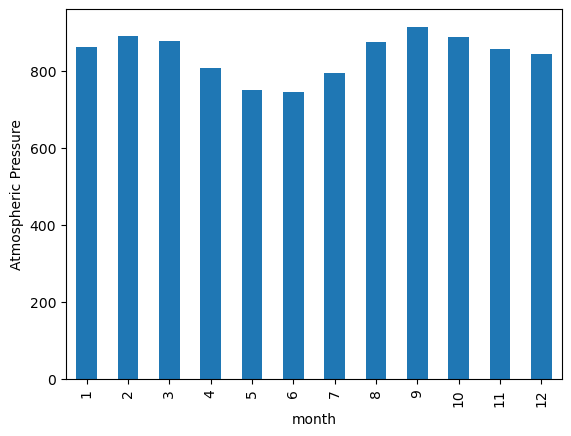

In [20]:
# Plot the average pressure by month
marsavg_atmpresmonth.plot(kind='bar')
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.show()

In [21]:
# Identify the lowest and highest average pressure months
# Find the index of the minimum and maximum values
marslowestavg_atmpresmonth = marsavg_atmpresmonth.idxmin()
marshighestavg_atmpresmonth = marsavg_atmpresmonth.idxmax()

# Print the lowest and highest atmospheric pressure months, on average
print("The lowest atmospheric pressure month is", marslowestavg_atmpresmonth)
print("The highest atmospheric pressure month is", marshighestavg_atmpresmonth)

The lowest atmospheric pressure month is 6
The highest atmospheric pressure month is 9


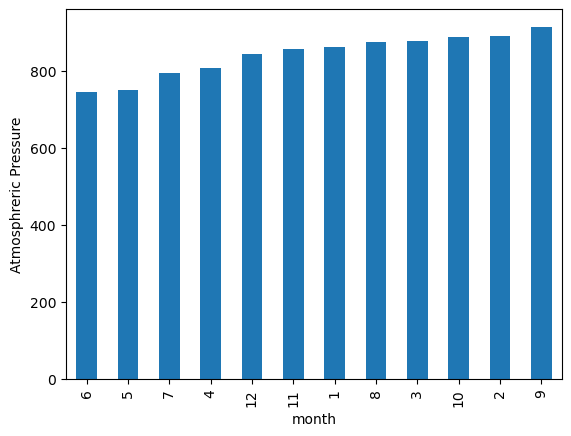

In [22]:
# Plot the average pressure by month, sorted by lowest and highest atmospheric pressure months, on average
marsavg_atmpresmonth.sort_values().plot.bar()
plt.xlabel("month")
plt.ylabel("Atmosphreric Pressure")
plt.show()

In [23]:
# Find number of dates counting from the starting date of the dataframe
marsweather_df['date_count']=marsweather_df['terrestrial_date']-pd.to_datetime('2012-08-16')
marsweather_df.dtypes

id                           object
terrestrial_date     datetime64[ns]
sol                           int64
ls                            int64
month                         int64
min_temp                    float64
pressure                    float64
date_count          timedelta64[ns]
dtype: object

In [24]:
# Convert to a timedelta with a day precision (to plot x axis)
marsweathertimesdelta_df=marsweather_df.astype({'date_count':'timedelta64[D]'})
marsweathertimesdelta_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,date_count
0,2,2012-08-16,10,155,6,-75.0,739.0,0.0
1,13,2012-08-17,11,156,6,-76.0,740.0,1.0
2,24,2012-08-18,12,156,6,-76.0,741.0,2.0
3,35,2012-08-19,13,157,6,-74.0,732.0,3.0
4,46,2012-08-20,14,157,6,-74.0,740.0,4.0
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020.0


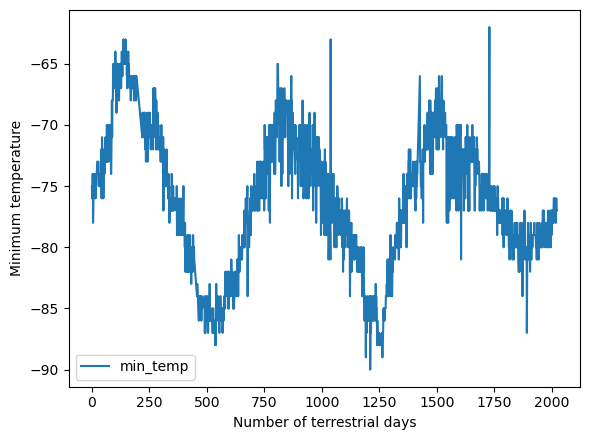

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?
marsweathertimesdelta_df.plot('date_count','min_temp',figsize=(6,4.5))
plt.xticks(np.arange(2021,step=250))
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.tight_layout()
plt.show()

In [32]:
# Calculate the distance from peak to peak 
martian_days = 1425 - 750
print("There are about", martian_days, "terrestrial days in a Martian year from the plot.")

There are about 675 terrestrial days in a Martian year from the plot.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
marsweathertimesdelta_df.to_csv('mars_weather.csv')

In [34]:
browser.quit()